In [2]:
%reload_ext autoreload
%autoreload 2

import sys

import py21cmfast as p21c
from astropy.cosmology import Planck18

sys.path.append("..")
from dm21cm.dm_params import DMParams
from dm21cm.evolve import evolve

In [ ]:
dd = evolve(
    run_name = 'test',
    z_start = 45.,
    z_end = 5.,
    zplusone_step_factor = 1.01,
    dm_params = DMParams(
        mode='swave',
        primary='phot_delta',
        m_DM=1e10,
        sigmav=1e-23,
        struct_boost_model='erfc 1e-3',
    ),
    enable_elec = False,
    tf_version = '230629',
    
    p21c_initial_conditions = p21c.initial_conditions(
        user_params = p21c.UserParams(
            HII_DIM = 64,
            BOX_LEN = 64 * 2, # [conformal Mpc]
            N_THREADS = 32,
        ),
        cosmo_params = p21c.CosmoParams(
            OMm = Planck18.Om(0),
            OMb = Planck18.Ob(0),
            POWER_INDEX = Planck18.meta['n'],
            SIGMA_8 = Planck18.meta['sigma8'],
            hlittle = Planck18.h,
        ),
        random_seed = 54321,
        write = True,
    ),
    
    rerun_DH = False,
    clear_cache = False,
    use_tqdm = False,
    debug = True,
)

In [4]:
import numpy as np
import pickle

import matplotlib.pyplot as plt

In [5]:
ar0 = pickle.load(open("../outputs/tmp/records_test.p", 'rb'))
ar0 = {k: np.array([r[k] for r in ar0]) for k in ar0[0].keys()}

In [8]:
ar = np.load("../data/run_info/test_records.npy", allow_pickle=True).item()

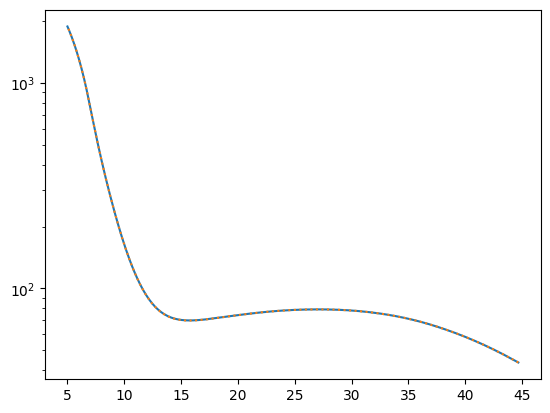

In [10]:
plt.plot(ar['z'], ar['T_k'])
plt.plot(ar0['z'], ar0['T_k'], ':')
plt.yscale('log')